

# Lab: Data Wrangling

## Extract data from a scientific paper



In [3]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load HTML using Pandas. If on Colab, you must upload the HTML to your session.
df_original = pd.read_html("croke.html")

### Task 0

What is the type of `df_original`? We want to focus on the "No salt" data set, so go ahead and extract that.


The df_original file is a list of dataframes of size one. To access the dataframe we simply take the first element of this list. Then, we have a dataframe with two columns, No Salt and 150 mM NaCl, of which we only extract the No Salt part.

In [39]:
#| tbl-cap: Extracted data from the html file. Some cleaning need to be done first for it to be usable

df_nosalt = df_original[0]['No salt']
df_nosalt.head()


,Site,pKa,n,Î´low,Î´high
0,Asp2,3.61 Â± 0.05,1.30 Â± 0.21,38.64 Â± 0.09,41.99 Â± 0.06
1,"Glu13cc Glu13, Glu46 and Glu105 titrate as a s...",4.21 Â± 0.06,0.90 Â± 0.08,33.11 Â± 0.08,36.79 Â± 0.08
2,Glu20,4.07 Â± 0.04,0.93 Â± 0.06,33.10 Â± 0.05,36.74 Â± 0.04
3,Glu28,4.20 Â± 0.06,0.96 Â± 0.09,33.16 Â± 0.08,36.92 Â± 0.08
4,Glu35dd The assignments for Glu35 and Glu110 a...,4.17Â±0.06,0.93 Â± 0.08,33.11 Â± 0.07,36.69 Â± 0.07


### Task 1

In this first task, we clean up the data. The html table extraction worked relatively well, but there are a few artifacts that needs to corrected, as well as tidying up the data. 

The first thing to do is to separate the values from the uncertainties for all the measurements.


In [133]:
def split_uncertainties(df,column: str):
    """Split the values and uncertainties for given column,
    and add them to the dataframe

    Args:
        df (_type_): the dataframe
        column (str): the column in question
    """
    split = df_nosalt[column].str.split('±|Â')
    df_copy = df.copy()
    val  = split.str.get(0).astype(float)
    err = split.str.get(2).astype(float)
    df_copy[column] = val
    df_copy[column + '_err'] = err
    return df_copy


#Splitting values and uncertainties for all the relevant columns
df2 = split_uncertainties(df_nosalt,'pKa')
df2 = split_uncertainties(df2, 'n')
df2 = split_uncertainties(df2, 'Î´low')
df2 = split_uncertainties(df2, 'Î´high')


Then, the site column need to be split in two. One with the name of the site, and the other with the number.

In [134]:
def split_site(df):
    df2 = df.copy() 
    #Copying makes this easier to rerun cells independently if need be
    #Probably not the most performance friendly, but the 
    #data set is small anyway!
    split = df2["Site"].str.split("([A-Za-z]+)(\d+)")
    resname = split.str.get(1)
    resnum = split.str.get(2).astype("Int64")
    df2['resname'] = resname
    df2['resnum'] = resnum
    df2 = df2.drop(columns= ('Site'))
    return df2

df3 = split_site(df2)
#Doing this by hand, as it is alone
df3.loc[df3.index[-1],'resname'] = 'alpha-CO_m'



### Task 2

Export the above data to a `CSV` file. Motivate why or why not this is a good idea?

Once the cleaning is done, saving it as a csv file allows us to load it easily with pandas again without having to redo the cleaning steps.

This is useful if cleaning takes a long time (for very large datasets), if we want to share the data with someone else, without having to share the code, or if we want to analyze the data in another program.


In [111]:
df3.to_csv('pka_nosalt.csv',index = False)

## Figure reproduction

As instructed, we can reproduce the figure that was asked of us. The tidy and clean data makes it very easy to do so.

Text(0.5, 1.0, 'Acid dissociation constants, $pK_a$ of glutamates')

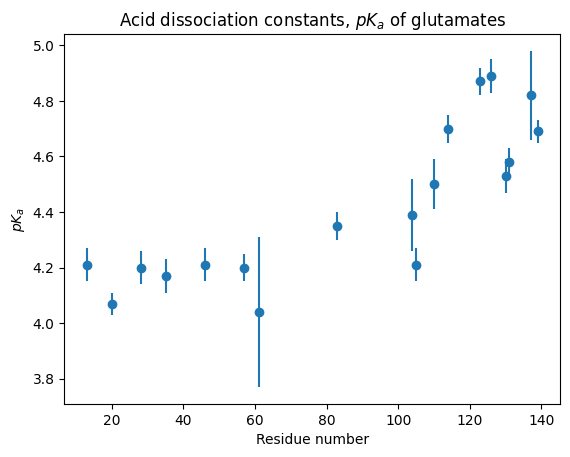

In [132]:
#| fig-cap: Reproduction of the figure shown in the lab instruction

dfGlu = df3[df3['resname'] == "Glu"]
#Filter to only get the Glutamates.

fig , ax = plt.subplots()

x = dfGlu['resnum']
y = dfGlu['pKa']
err = dfGlu['pKa_err']
ax.errorbar(x,y,yerr = err, fmt='o')
ax.set_xlabel('Residue number')
ax.set_ylabel('$pK_a$')
ax.set_title('Acid dissociation constants, $pK_a$ of glutamates')


## Relating the paper to the FAIR principles


While unwieldy, the data used to reproduce the figure above was available. However, this does not seem to be the case for all figures, which makes reusing the data impossible.

The licensing part is also non-ideal. Clicking on the detail part reveals a copyright from the protein society, which does not give me any further information on permissions to reuse or derive from the data in the paper. Going to the protein society website did not help either, as I could not find any information on that part. 

Even in the presence of data, the code used to reproduce these figures does not seem to be readily available. This is an advantage of working on this notebook which could for example be uploaded to a repository, as well as the cleaned data, in a format that is easily readable by a computer. For this reason, this work would be an improvement w.r.t the FAIR principles. It would be a good idea to also includes meta-data for it.





